In [ ]:
# importing the libraries

import matplotlib.pyplot as plt
from sklearn import datasets
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# loading the data

import matplotlib.pyplot as plt
from sklearn import datasets
from IPython.display import display
import pandas as pd
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
display(pd.concat([iris_df.head(3), iris_df.tail(3)]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
print('targets: {}'.format(iris.target_names))

targets: ['setosa' 'versicolor' 'virginica']


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


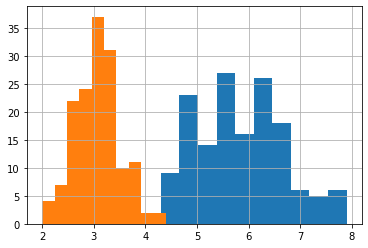

In [ ]:
# visualising the data of sepal legnth and width
# blue = sepal length
# orange = sepal width

iris_df['sepal length (cm)'].hist()
iris_df['sepal width (cm)'].hist()



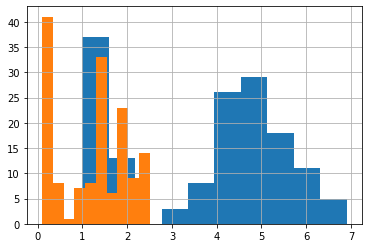

In [ ]:
# visualising the data of petal legnth and width
# blue = sepal length
# orange = sepal width

iris_df['petal length (cm)'].hist()
iris_df['petal width (cm)'].hist()

In [ ]:
'''
Sepal Length, Sepal Width, Petal Length, and Petal Width have float data types.  
This syntax is to check the number of samples of each class.
'''

iris_df['target'].value_counts()

# result shows that in each class, we have 50 samples


0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
# Visualising a relation between sepal length and sepal width, petal length and petal width

# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.scatterplot(x='petal length cm', y='petal width cm',
                hue='target', data=iris_df, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

ValueError: ignored

In [ ]:
'''
A correlation matrix shows the correlation between the two variables. 
The value is in the range of -1 to +1. 
If two variables have a correlation much nearer to +1 or -1, we can neglect one variable.
We are going to construct the matrix from the input attributes.
'''

iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
# Task 1 - using 80% training data
X = iris_df.drop(['target'], axis=1) # number of features/attributes
y = iris_df['target'] # Ground truth or lable or target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [ ]:
# Task 1 - train the model using LogistivRegression

from sklearn.utils.multiclass import check_classification_targets

model = LogisticRegression()
model.fit(X_train, y_train)

# test the model
predictions = model.predict(X_test)
print(predictions)
print(y_test)

# check accuracy
accuracy=100*metrics.accuracy_score(y_test, predictions)
print("Accuracy -", accuracy)


[1 2 2 0 2 1 0 2 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]
82     1
134    2
114    2
42     0
109    2
57     1
1      0
70     1
25     0
84     1
66     1
133    2
102    2
107    2
26     0
23     0
123    2
130    2
21     0
12     0
71     1
128    2
48     0
72     1
88     1
148    2
74     1
96     1
63     1
132    2
Name: target, dtype: int64
Accuracy - 96.66666666666667


Text(0.5, 0, 'Number of Instances/Samples')

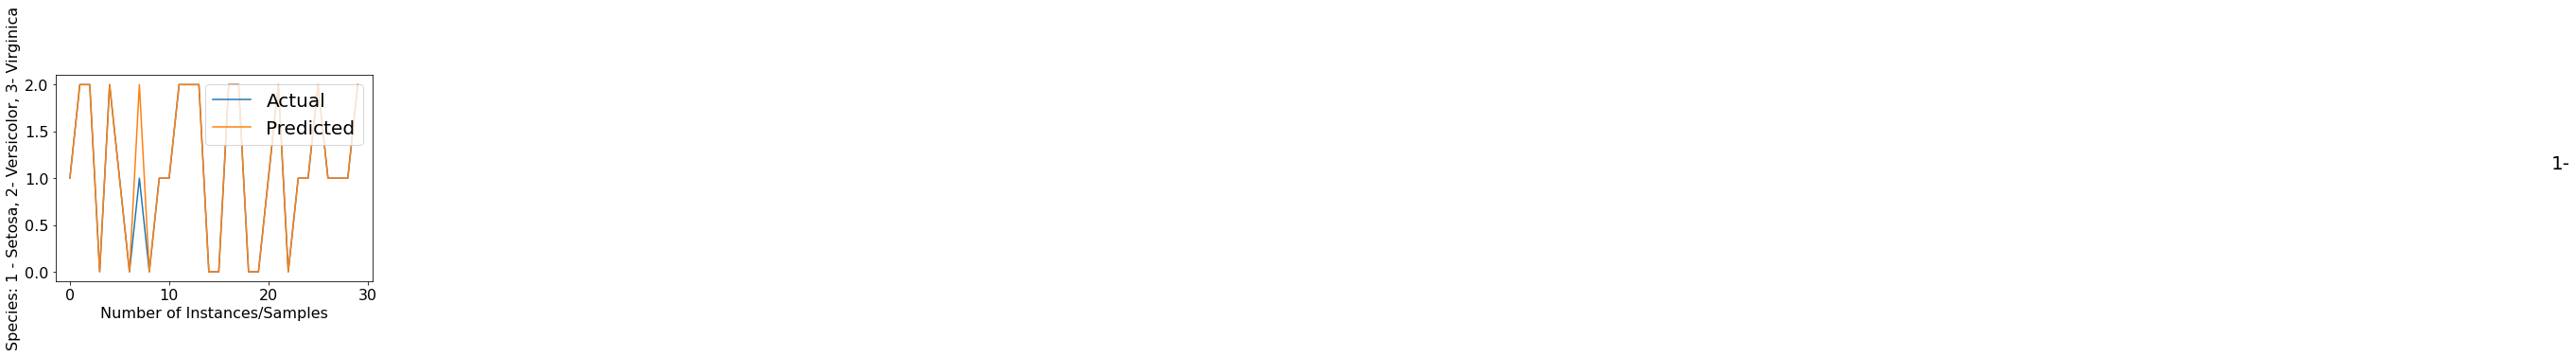

In [ ]:

plt.figure()
y_test=y_test.to_numpy()
plt.plot(y_test,label="Actual")
plt.plot(predictions,label="Predicted")
plt.tick_params(labelsize=16)
plt.legend(loc='best', prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(250, 1.1, r'1-',fontsize=20)
plt.legend(loc='best', prop={'size': 20})
plt.ylabel('Species: 1 - Setosa, 2- Versicolor, 3- Virginica',fontsize=16)
plt.xlabel('Number of Instances/Samples',fontsize=16)